In [1]:
import matplotlib.pyplot as plt
import os, sys

In [2]:
def define_color(cell):
    if cell == '#':
        return 'black'
    elif cell == ' ':   # Espacio vacío
        return 'white'
    elif cell == 'E':   # Entrada
        return 'green'
    elif cell == 'S':   # Salida
        return 'red'

In [3]:
project_path = os.getcwd()
sys.path.append(project_path)

In [4]:
class MazeLoader:
    def __init__(self, filename):
        self.filename = filename
        self.maze = None

    def load_Maze(self):
        _maze = []
        file_path = os.path.join(project_path, self.filename)
        print("Loading Maze from", file_path)
        with open(file_path, 'r') as file:
            for line in file:
                _maze.append(list(line.strip()))
        self.maze = _maze
        return self

    def plot_maze(self):
        height = len(self.maze)
        width = len(self.maze[0])

        fig = plt.figure(figsize=(width/4, height/4))  # Ajusta el tamaño de la figura según el tamaño del Maze
        for y in range(height):
            for x in range(width):
                cell = self.maze[y][x]
                color = define_color(cell)
                plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')

        plt.xlim(0, width)
        plt.ylim(0, height)
        plt.gca().invert_yaxis()  # Invierte el eje y para que el origen esté en la esquina inferior izquierda
        plt.xticks([])
        plt.yticks([])
        fig.tight_layout()
        plt.show()
        return self
    def get_graph(self):
        # Convertir el laberinto en un grafo
        graph = {}
        height = len(self.maze)
        width = len(self.maze[0])
        for y in range(height):
            for x in range(width):
                cell = self.maze[y][x]
                if cell == '#':
                    continue
                neighbors = []
                if y > 0 and self.maze[y-1][x] != '#':
                    neighbors.append((x, y-1))
                if y < height - 1 and self.maze[y+1][x] != '#':
                    neighbors.append((x, y+1))
                if x > 0 and self.maze[y][x-1] != '#':
                    neighbors.append((x-1, y))
                if x < width - 1 and self.maze[y][x+1] != '#':
                    neighbors.append((x+1, y))
                graph[(x, y)] = neighbors
        return graph
    
    

Loading Maze from d:\Inteligencia_Artificial\WS-USFQ\Taller2\P1\laberinto1.txt


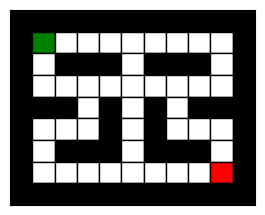

In [5]:
# leer el laberinto desde un archivo
maze_loader = MazeLoader('laberinto1.txt')
maze_loader.load_Maze()
maze_loader.plot_maze()


In [ ]:
import time
import matplotlib.pyplot as plt
from collections import deque
import heapq

class MazeLoader:
    def __init__(self, filename):
        self.filename = filename
        self.maze = []
        self.start = None
        self.end = None

    def load_Maze(self):
        with open(self.filename, 'r') as file:
            self.maze = [list(line.strip()) for line in file]

        for i, row in enumerate(self.maze):
            for j, cell in enumerate(row):
                if cell == 'S':
                    self.start = (i, j)
                elif cell == 'E':
                    self.end = (i, j)

    def plot_maze(self, path=None, title="Laberinto", filename=None, color=0.5):
        maze_map = {'#': 0, ' ': 1, 'S': 0.2, 'E': 0.8}
        grid = [[maze_map.get(cell, 1) for cell in row] for row in self.maze]

        if path:
            for r, c in path:
                if self.maze[r][c] not in ['S', 'E']:
                    grid[r][c] = color

        plt.imshow(grid, cmap='gray_r')
        plt.title(title)
        plt.axis('off')
        if filename:
            plt.savefig(filename, bbox_inches='tight')
        plt.show()

    def get_neighbors(self, pos):
        rows, cols = len(self.maze), len(self.maze[0])
        directions = [(-1,0), (1,0), (0,-1), (0,1)]
        neighbors = []
        for dr, dc in directions:
            r, c = pos[0] + dr, pos[1] + dc
            if 0 <= r < rows and 0 <= c < cols and self.maze[r][c] != '#':
                neighbors.append((r, c))
        return neighbors

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set()
        nodes_expanded = 0

        while queue:
            (current, path) = queue.popleft()
            if current in visited:
                continue
            visited.add(current)
            nodes_expanded += 1

            if current == self.end:
                return path, nodes_expanded

            for neighbor in self.get_neighbors(current):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))

        return None, nodes_expanded

    def astar(self):
        open_set = [(self.heuristic(self.start, self.end), 0, self.start, [self.start])]
        visited = set()
        nodes_expanded = 0

        while open_set:
            _, cost, current, path = heapq.heappop(open_set)
            if current in visited:
                continue
            visited.add(current)
            nodes_expanded += 1

            if current == self.end:
                return path, nodes_expanded

            for neighbor in self.get_neighbors(current):
                if neighbor not in visited:
                    new_cost = cost + 1
                    priority = new_cost + self.heuristic(neighbor, self.end)
                    heapq.heappush(open_set, (priority, new_cost, neighbor, path + [neighbor]))

        return None, nodes_expanded

    def comparar_algoritmos(self):
        # BFS
        t0 = time.perf_counter()
        path_bfs, nodes_bfs = self.bfs()
        time_bfs = time.perf_counter() - t0

        # A*
        t0 = time.perf_counter()
        path_astar, nodes_astar = self.astar()
        time_astar = time.perf_counter() - t0

        print("Resultados de búsqueda:")
        print(f"BFS   → Tiempo: {time_bfs:.6f}s, Nodos: {nodes_bfs}, Longitud: {len(path_bfs)}")
        print(f"A*    → Tiempo: {time_astar:.6f}s, Nodos: {nodes_astar}, Longitud: {len(path_astar)}")

        # Graficar y guardar imágenes
        self.plot_maze(path_bfs, title="Solución BFS", filename="bfs_solution.png", color=0.4)
        self.plot_maze(path_astar, title="Solución A*", filename="astar_solution.png", color=0.6)


Resultados de búsqueda:
BFS   → Tiempo: 0.000124s, Nodos: 43, Longitud: 15
A*    → Tiempo: 0.000151s, Nodos: 33, Longitud: 15


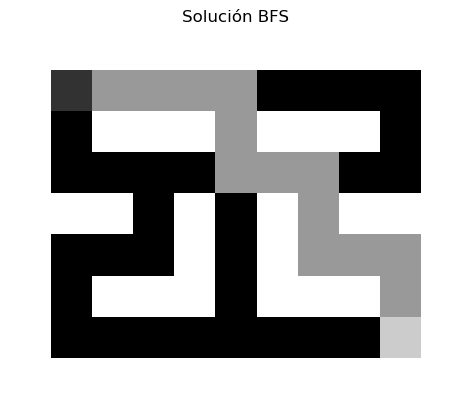

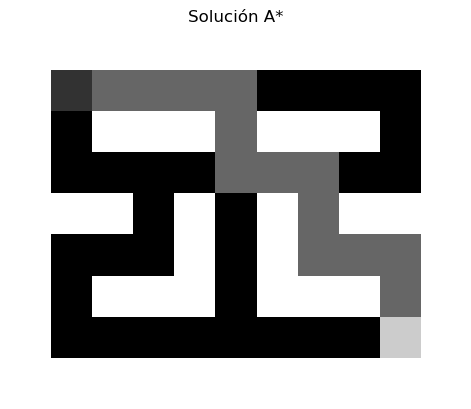

In [10]:
maze_loader = MazeLoader('laberinto1.txt')
maze_loader.load_Maze()
maze_loader.comparar_algoritmos()


Resultados de búsqueda:
BFS   → Tiempo: 0.001950s, Nodos: 158, Longitud: 45
A*    → Tiempo: 0.001454s, Nodos: 72, Longitud: 45


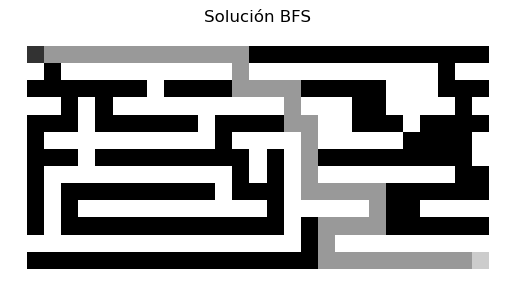

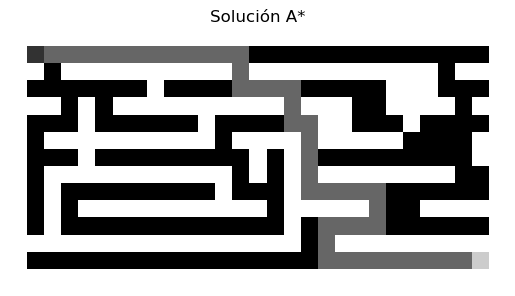

In [11]:
maze_loader = MazeLoader('laberinto2.txt')
maze_loader.load_Maze()
maze_loader.comparar_algoritmos()

Resultados de búsqueda:
BFS   → Tiempo: 0.013882s, Nodos: 1268, Longitud: 345
A*    → Tiempo: 0.018683s, Nodos: 1262, Longitud: 345


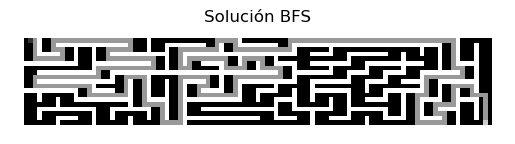

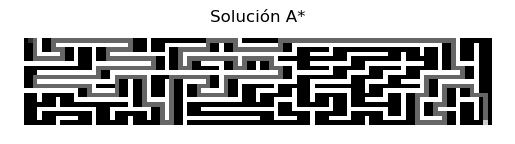

In [12]:
maze_loader = MazeLoader('laberinto3.txt')
maze_loader.load_Maze()
maze_loader.comparar_algoritmos()

Las metricas utilizadas para comparar ambos algoritmos de búsqueda son importantes ya que nos permite evaluar la efectividad de cada uno de ellos. Tanto el tiempo como el número de nodos recorridos son métricas necesarias para saber al final cual de ellos se deben usar para un óptimo rendimiento.